<a href="https://colab.research.google.com/github/vijayalakshmi-creator/nm-phase2/blob/main/houserent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicted Prices: [ 214981.24958173  335127.75484479  674892.46942885  348337.17279786
  803742.97696394 1299769.97367899  599974.42448264  750095.74955751
 1068771.53652317  266726.42618602 1099909.64159408  266726.42618602]
Mean Absolute Error: 27524.666401085746


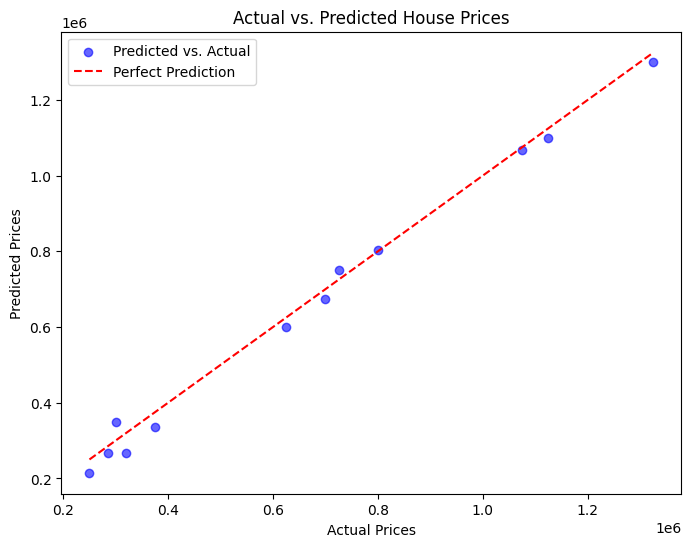

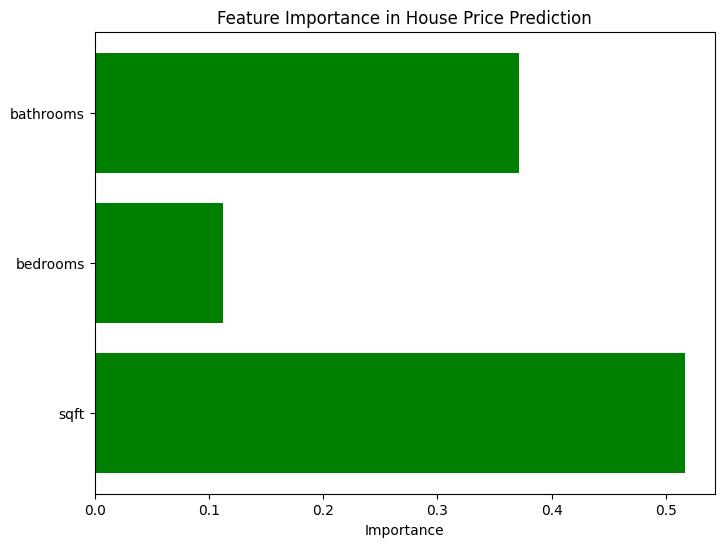

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load CSV file
data = pd.read_csv(r"/content/house_prices.csv")  # Ensure the CSV file is in the correct directory

# Splitting data
X = data[['sqft', 'bedrooms', 'bathrooms']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Predicted Prices: {y_pred}")
print(f"Mean Absolute Error: {mae}")
# Scatter plot of actual vs. predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label="Predicted vs. Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label="Perfect Prediction")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.legend()
plt.show()

# Feature Importance plot
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, color='green')
plt.xlabel("Importance")
plt.title("Feature Importance in House Price Prediction")
plt.show()
